In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

#   train_datagen = ImageDataGenerator(
#           rescale=1./255,
#           shear_range=0.2,
#           zoom_range=0.2,
#           horizontal_flip=True)

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = datagen.flow_from_directory(  # train_datagen
        'NEU_DET/Train_IMAGES',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200 x 200
        color_mode='grayscale',
        batch_size = 64,
        # Specify the classes explicitly
        classes = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
test_generator = datagen.flow_from_directory(
        'NEU_DET/Test_IMAGES',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200 x 200
        color_mode='grayscale', # grayscale, rgb
        batch_size = 64,  # 128, 64, 32, 24
        # Specify the classes explicitly
        classes = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


Found 1464 images belonging to 6 classes.
Found 336 images belonging to 6 classes.


In [2]:
train_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled_in_scale': 4,
 'scratches': 5}

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(1024, activation='relu'),  # 1024, 128, 64, 32
    # 6 output neurons for 6 classes with the softmax activation
    tf.keras.layers.Dense(6, activation='sigmoid')  # softmax
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [3]:
# Image Detection Using the VGG-19 Convolutional Neural Network

# Build VGG19 structure
from tensorflow.keras.applications import VGG19

base_model = VGG19()

#   base_model = VGG19(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200,200,3))

print('VGG19 Loaded')
print(base_model.summary())

574717952/574710816 [==============================] - 254s 0us/step
VGG19 Loaded
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

In [2]:
# Image Detection Using the VGG-19 Convolutional Neural Network

# Build VGG19 structure
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet',include_top=False, input_shape=(200,200,3))

print('VGG19 Loaded')
print(base_model.summary())

VGG19 Loaded
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)

In [ ]:
# Image Detection Using the VGG-19 Convolutional Neural Network


# specify dataset size
batch_size = 16
nb_train_samples = 2084
nb_validation_samples = 167
nb_test_samples = len(os.listdir('data/test/tree')) + len(os.listdir('data/test/not_tree'))

In [ ]:
# Image Detection Using the VGG-19 Convolutional Neural Network


# Build extraction function to get features and labels

def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 7,7, 512))
    labels = np.zeros(shape=(sample_amount))
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size(200,200),
        class_mode='categorical')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batc_size >= sample_amount:
            break
    return features, labels

In [ ]:
# Image Detection Using the VGG-19 Convolutional Neural Network


# Apply extraction function to 3 datasets

train_features, train_labels = extract_features(train_folder, nb_train_samples)
validation_features, validation_labels = extract_features(val_folder, nb_validation_samples)
test_features, test_labels = extract_features(test_folder, nb_test_samples)

In [ ]:
# Image Detection Using the VGG-19 Convolutional Neural Network


# Shape data

reshape_y = 7 * 7 * 512
train_features = np.reshape(train_features, (nb_train_samples, reshape_y))
validation_features = np.reshape(validation_features, (np_validation_samples, reshape_y))
test_features = np.reshape(test_features, (np_test_samples, reshape_y))

In [ ]:
# Image Detection Using the VGG-19 Convolutional Neural Network


# # Save features and labels

os.mkdir('data/bottlenecked')
np

In [3]:
# Image Detection Using the VGG-19 Convolutional Neural Network

import tensorflow as tf

# load model and specify a new input shape for images
#new_input = Input(shape=(200, 200, 1))
#model = VGG19(include_top=False, input_tensor=(200,200,3))

model = tf.keras.models.Sequential(base_model)
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))  # 4096, 2048
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              37750784  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
Total params: 57,787,462
Trainable params: 57,787,462
Non-trainable params: 0
_________________________________________________________________


In [3]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
from tensorflow.keras.optimizers import RMSprop

#   model.compile(loss='categorical_crossentropy',
#                 optimizer=RMSprop(lr=0.0001),
#                 metrics=['acc'])

In [4]:
history = model.fit(
        train_generator,
        validation_data = test_generator,
        epochs = 30)

Epoch 1/30
23/23 [==============================] - 31s 1s/step - loss: 1.7446 - accuracy: 0.2223 - val_loss: 1.4439 - val_accuracy: 0.3423
Epoch 2/30
23/23 [==============================] - 30s 1s/step - loss: 1.3996 - accuracy: 0.4516 - val_loss: 1.0380 - val_accuracy: 0.5298
Epoch 3/30
23/23 [==============================] - 34s 1s/step - loss: 0.8721 - accuracy: 0.6642 - val_loss: 0.6160 - val_accuracy: 0.7619
Epoch 4/30
23/23 [==============================] - 30s 1s/step - loss: 0.5137 - accuracy: 0.8076 - val_loss: 0.3565 - val_accuracy: 0.9077
Epoch 5/30
23/23 [==============================] - 30s 1s/step - loss: 0.3890 - accuracy: 0.8712 - val_loss: 0.4267 - val_accuracy: 0.8750
Epoch 6/30
23/23 [==============================] - 30s 1s/step - loss: 0.4310 - accuracy: 0.8581 - val_loss: 0.2587 - val_accuracy: 0.9286
Epoch 7/30
23/23 [==============================] - 30s 1s/step - loss: 0.2315 - accuracy: 0.9064 - val_loss: 0.1736 - val_accuracy: 0.9464
Epoch 8/30
23/23 [==

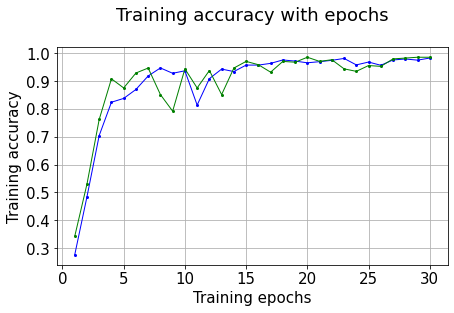

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(30)],history.history['accuracy'],'-o',c='b',lw=1,markersize=2)
plt.plot([i+1 for i in range(30)],history.history['val_accuracy'],'-o',c='g',lw=1,markersize=2)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#from tqdm import tqdm

DATADIR = 'NEU_DET/Train_IMAGES'

CATEGORIES = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    train_class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        
        train_img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)     # convert to array
        plt.imshow(train_img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

    
DATADIR = 'NEU_DET/Test_IMAGES'

CATEGORIES = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    test_class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        
        test_img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)     # convert to array
        plt.imshow(test_img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [ ]:
print(train_img_array[0])

In [ ]:
print(test_img_array.shape)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(train_class_num)

print(y_train[6])

In [ ]:
import keras

X_train = train_img_array
y_train = keras.utils.to_categorical(X_train, class_num)

X_test = test_img_array
y_test = keras.utils.to_categorical(X_test, class_num)

In [ ]:
print(X_test[10])

In [ ]:
print(y_train[0])

In [ ]:
tf.keras.preprocessing.image_dataset_from_directory(
    'NEU_DET/Test_IMAGES',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(200, 200),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='categorical',
    follow_links=False,
)


In [ ]:
import tensorflow as tf

tf.keras.preprocessing.image.load_img(
    'NEU_DET/Test_IMAGES/crazing/crazing_218.jpg', 
    grayscale=True, 
    color_mode="grayscale", 
    target_size=None, 
    interpolation="categorical"
)


In [ ]:
image = tf.keras.preprocessing.image.load_img('NEU_DET/Test_IMAGES/crazing/crazing_218.jpg')
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)